<div class="alert alert-block alert-info"><br>
    <h2>Week 8_Scraping Web Data (Webinar WITH ANSWERS)</h2> <br>
    <p>Follow the steps below to scrape off web data from <a href="https://www.worldwildlife.org/species/directory#">the website on worldwildlife</a>.</p><br>
    <p>In this webinar, we'll revise the code of slicing, loops, user-defined functions, creating and cleaning DataFrames, and visualization of categorical data.</p>
</div>

<div style="background-color: coral">
<h2>Part 1: Scrape and organize data</h2>
</div>

In [1]:
# Import the requests and BeautifulSoup libraries

import requests as re

from bs4 import BeautifulSoup as bs

In [2]:
# Establish the connection with the webpage by sending a GET request to its server

url = re.get("https://www.worldwildlife.org/species/directory#")

# Check whether the connection has been established
url

<Response [200]>

In [3]:
# Grab the content of the HTML page
content = url.content

# Print out the variable in which you've stored the HTML content
content

b'<!DOCTYPE html>\n<html class="js" lang="en">\n<head>\n\t<title>Species List | Endangered, Vulnerable, and Threatened Animals | WWF</title>\n\t<meta charset="utf-8">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"6990b25c83","applicationID":"3688396","transactionName":"cAteQhZdWFUGER1FSVYHWVMXHVBQEQZRQlZBHQ==","queueTime":0,"applicationTime":181,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).loader_config={xpid:"UwMEVFZRGwAGXFlRDgc=",licenseKey:"6990b25c83",applicationID:"3688396"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var i,o=t("ee"),a=t(20),c={};try{i=localSt

In [4]:
# Parse the HTML page with a parser of your choosing
html = bs(content, 'html.parser')

# Print out the variable in which you've stored the parsed HTML page
html

<!DOCTYPE html>

<html class="js" lang="en">
<head>
<title>Species List | Endangered, Vulnerable, and Threatened Animals | WWF</title>
<meta charset="utf-8"/>
<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"6990b25c83","applicationID":"3688396","transactionName":"cAteQhZdWFUGER1FSVYHWVMXHVBQEQZRQlZBHQ==","queueTime":0,"applicationTime":181,"agent":""}</script>
<script>(window.NREUM||(NREUM={})).loader_config={xpid:"UwMEVFZRGwAGXFlRDgc=",licenseKey:"6990b25c83",applicationID:"3688396"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var i,o=t("ee"),a=t(20),c={};try{i=localStorage.getI

In [5]:
# Scrape off all three columns of data. You will need to inspect the <table> and <tbody> elements 
# Note that you need to find the html element that is closest to the text that you want to scrape
# <table> and <tbody> are the wrapper elements that do not contain the immediate text/content

data = html.find_all('td')

data


[<td class="keep"><a data-track-event="Species Directory|Species Click|African Elephant" href="/species/african-elephant">African Elephant</a></td>,
 <td><em>Loxodonta africana</em></td>,
 <td>Vulnerable</td>,
 <td class="keep"><a data-track-event="Species Directory|Species Click|African Wild Dog" href="/species/african-wild-dog">African Wild Dog</a></td>,
 <td><em>Lycaon pictus</em></td>,
 <td>Endangered</td>,
 <td class="keep"><a data-track-event="Species Directory|Species Click|Albacore Tuna" href="/species/albacore-tuna">Albacore Tuna</a></td>,
 <td><em>Thunnus alalunga</em></td>,
 <td>Near Threatened</td>,
 <td class="keep"><a data-track-event="Species Directory|Species Click|Amazon River Dolphin" href="/species/amazon-river-dolphin">Amazon River Dolphin</a></td>,
 <td><em>Scientific Name Inia geoffrensis</em></td>,
 <td></td>,
 <td class="keep"><a data-track-event="Species Directory|Species Click|Amur Leopard" href="/species/amur-leopard">Amur Leopard</a></td>,
 <td><em>Panthera 

In [6]:
# Extract text only with the .text property and store it in a list either 
# with a for-loop 

Species = []

for i in data:
    name = i.text
    Species.append(name)

# or with a list comprehension construct

Species2 = [i.text for i in data]

# Print out the scraped data
# What do you see? Does it need any sorting out?
print(Species)

print(Species2)

['African Elephant', 'Loxodonta africana', 'Vulnerable', 'African Wild Dog', 'Lycaon pictus', 'Endangered', 'Albacore Tuna', 'Thunnus alalunga', 'Near Threatened', 'Amazon River Dolphin', 'Scientific Name Inia geoffrensis', '', 'Amur Leopard', 'Panthera pardus orientalis', 'Critically Endangered', 'Arctic Fox', 'Vulpes  lagopus', 'Least Concern', 'Arctic Wolf', 'Canis lupus arctos', 'Least Concern', 'Asian Elephant', 'Elephas maximus indicus', 'Endangered', 'Beluga', 'Delphinapterus leucas', 'Near Threatened', 'Bigeye Tuna', 'Thunnus obesus', 'Vulnerable', 'Black Rhino', 'Diceros bicornis', 'Critically Endangered', 'Black Spider Monkey', 'Ateles paniscus', 'Vulnerable', 'Black-footed Ferret', 'Mustela nigripes', 'Endangered', 'Blue Whale', 'Balaenoptera musculus', 'Endangered', 'Bluefin Tuna', 'Thunnus Thynnus', 'Endangered', 'Bonobo', 'Pan paniscus', 'Endangered', 'Bornean Elephant', 'Elephas maximus borneensis', 'Endangered', 'Bornean Orangutan', 'Pongo pygmaeus', 'Critically Endange

In [7]:
# Import pandas and sift out 'Common Names' into one list, then 'Scientific Names' into another list, 
# and 'Conservation Status' into a third list
# Alternatively, you may want to sift out three types of variables into lists by using loops
# Slice off only the Common Names from the list created above and print out the variable to see the results
# Use the double colon :: to set the slicer to jump the items in the list created above by three, and 
# as it jumps by three, it should clice off items in index position[0], e.g. name[0::3]

import pandas as pd

CommonNames = Species[0::3]
CommonNames

['African Elephant',
 'African Wild Dog',
 'Albacore Tuna',
 'Amazon River Dolphin',
 'Amur Leopard',
 'Arctic Fox',
 'Arctic Wolf',
 'Asian Elephant',
 'Beluga',
 'Bigeye Tuna',
 'Black Rhino',
 'Black Spider Monkey',
 'Black-footed Ferret',
 'Blue Whale',
 'Bluefin Tuna',
 'Bonobo',
 'Bornean Elephant',
 'Bornean Orangutan',
 'Bowhead Whale',
 'Brown Bear',
 'Chimpanzee',
 'Common Bottlenose Dolphin',
 'Continental Tiger',
 'Cross River Gorilla',
 'Dolphins and Porpoises',
 'Dugong',
 'Eastern Lowland Gorilla',
 'Elephant',
 'Fin Whale',
 'Forest Elephant',
 'Galápagos Penguin',
 'Ganges River Dolphin',
 'Giant Panda',
 'Giant Tortoise',
 'Gorilla',
 'Gray Whale',
 'Great White Shark',
 'Greater One-Horned Rhino',
 'Greater Sage-Grouse',
 'Green Turtle',
 'Hawksbill Turtle',
 "Hector's Dolphin",
 'Hippopotamus',
 'Humphead Wrasse',
 'Indian Elephant',
 'Indus River Dolphin',
 'Irrawaddy Dolphin',
 'Jaguar',
 'Javan Rhino',
 'Leatherback Turtle']

In [8]:
# Slice off only the Scientific Names from the pd.Series created above and print out the variable to see the results

Scientific = Species[1::3]
Scientific

['Loxodonta africana',
 'Lycaon pictus',
 'Thunnus alalunga',
 'Scientific Name Inia geoffrensis',
 'Panthera pardus orientalis',
 'Vulpes  lagopus',
 'Canis lupus arctos',
 'Elephas maximus indicus',
 'Delphinapterus leucas',
 'Thunnus obesus',
 'Diceros bicornis',
 'Ateles paniscus',
 'Mustela nigripes',
 'Balaenoptera musculus',
 'Thunnus Thynnus',
 'Pan paniscus',
 'Elephas maximus borneensis',
 'Pongo pygmaeus',
 'Balaena mysticetus',
 'Ursus arctos',
 'Pan troglodytes',
 'Tursiops truncates',
 'Panthera tigris tigris',
 'Gorilla gorilla diehli',
 '',
 'Dugong dugon',
 'Gorilla beringei graueri',
 '',
 'Balaenoptera physalus',
 '',
 'Spheniscus mendiculus',
 'Platanista gangetica gangetica',
 'Ailuropoda melanoleuca',
 '',
 'Gorilla gorilla and Gorilla beringei',
 'Eschrichtius robustus',
 'Carcharodon carcharias',
 'Rhinoceros unicornis',
 'Centrocercus urophasianus',
 'Chelonia mydas',
 'Eretmochelys imbricata',
 'Cephalorhynchus hectori',
 'Hippopotamus amphibius',
 'Cheilinus 

In [9]:
# Slice off only the Conservation Status from the pd.Series created above & print out the variable to see the results

Conservation = Species[2::3]

Conservation

['Vulnerable',
 'Endangered',
 'Near Threatened',
 '',
 'Critically Endangered',
 'Least Concern',
 'Least Concern',
 'Endangered',
 'Near Threatened',
 'Vulnerable',
 'Critically Endangered',
 'Vulnerable',
 'Endangered',
 'Endangered',
 'Endangered',
 'Endangered',
 'Endangered',
 'Critically Endangered',
 'Least Concern',
 'Least Concern',
 'Endangered',
 'Least Concern',
 '',
 'Critically Endangered',
 '',
 'Vulnerable',
 'Critically Endangered',
 '',
 'Endangered',
 'Vulnerable',
 'Endangered',
 'Endangered',
 'Vulnerable',
 'Vulnerable',
 '',
 'Least Concern',
 'Vulnerable',
 'Vulnerable',
 'Near Threatened',
 'Endangered',
 'Critically Endangered',
 'Endangered',
 'Vulnerable',
 'Endangered',
 'Endangered',
 'Endangered',
 'Endangered',
 'Near Threatened',
 'Critically Endangered',
 'Vulnerable']

In [10]:
# Combine all three data variables into one DataFrame consisting of three columns
# if you created three lists above, as suggested, then use .DataFrame(list(zip(list1, list2, list3)), columns=[])

df = pd.DataFrame(list(zip(CommonNames, Scientific, Conservation)), columns=['Common Names', 'Scientific Names', 'Conservation Status'])

df

,Common Names,Scientific Names,Conservation Status
0,African Elephant,Loxodonta africana,Vulnerable
1,African Wild Dog,Lycaon pictus,Endangered
2,Albacore Tuna,Thunnus alalunga,Near Threatened
3,Amazon River Dolphin,Scientific Name Inia geoffrensis,
4,Amur Leopard,Panthera pardus orientalis,Critically Endangered
5,Arctic Fox,Vulpes lagopus,Least Concern
6,Arctic Wolf,Canis lupus arctos,Least Concern
7,Asian Elephant,Elephas maximus indicus,Endangered
8,Beluga,Delphinapterus leucas,Near Threatened
9,Bigeye Tuna,Thunnus obesus,Vulnerable


In [11]:
# Remove the rows that contain empty cells and print out the updated dataset
# Note that empty cells are not filled in with 'NaN', so first create a variable that converts 'NaN' strings to
# floats because pandas take NaN as a float

nan_Values = float("NaN")

# Then use .replace("", variable) to replace empty cells with 'NaN' values

df2 = df.replace("", nan_Values)

# Finally, use .dropna(subset=[Name of the third column]) to remove rows if that particular column contains 
# NaN or missing values. Other columns also have missing values but we can keep those for now
# because later we'll be visualizing only the conservation variables present in the third column 

df3 = df2.dropna(subset=["Conservation Status"],how = "all")


# Print out the variable in which you've stored the updated data
df3

,Common Names,Scientific Names,Conservation Status
0,African Elephant,Loxodonta africana,Vulnerable
1,African Wild Dog,Lycaon pictus,Endangered
2,Albacore Tuna,Thunnus alalunga,Near Threatened
4,Amur Leopard,Panthera pardus orientalis,Critically Endangered
5,Arctic Fox,Vulpes lagopus,Least Concern
6,Arctic Wolf,Canis lupus arctos,Least Concern
7,Asian Elephant,Elephas maximus indicus,Endangered
8,Beluga,Delphinapterus leucas,Near Threatened
9,Bigeye Tuna,Thunnus obesus,Vulnerable
10,Black Rhino,Diceros bicornis,Critically Endangered


In [12]:
# .reset_index(drop=True) 

df3.reset_index(drop=True)

,Common Names,Scientific Names,Conservation Status
0,African Elephant,Loxodonta africana,Vulnerable
1,African Wild Dog,Lycaon pictus,Endangered
2,Albacore Tuna,Thunnus alalunga,Near Threatened
3,Amur Leopard,Panthera pardus orientalis,Critically Endangered
4,Arctic Fox,Vulpes lagopus,Least Concern
5,Arctic Wolf,Canis lupus arctos,Least Concern
6,Asian Elephant,Elephas maximus indicus,Endangered
7,Beluga,Delphinapterus leucas,Near Threatened
8,Bigeye Tuna,Thunnus obesus,Vulnerable
9,Black Rhino,Diceros bicornis,Critically Endangered


<div style="background-color: coral">
<h2>Part 2: Visualize data</h2>
</div>

In [13]:
# Extract the metadata about the categorical data in the 'Conservation Status' column with .value_counts()
Conservation = df3["Conservation Status"].value_counts()

Conservation

# What type of categories and how many do you get?

Endangered               17
Vulnerable               11
Critically Endangered     7
Least Concern             6
Near Threatened           4
Name: Conservation Status, dtype: int64

In [14]:
# Extract index and values with .index and .values properties

print(Conservation.index)

print(Conservation.values)

Index(['Endangered', 'Vulnerable', 'Critically Endangered', 'Least Concern',
       'Near Threatened'],
      dtype='object')
[17 11  7  6  4]


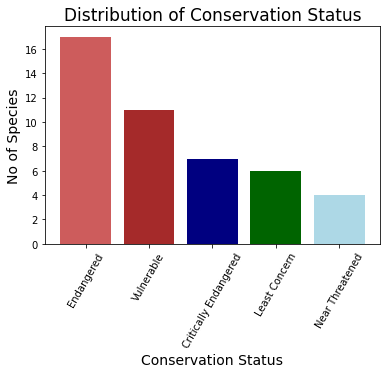

In [15]:
# Plot the distribution of conservation status as a bar chart

# Define a custom list of colors
Colors =['indianred', 'brown', 'navy', 'darkgreen', 'lightblue']


# Import numpy because you will need its .arange() method to create as many bars as there are data categories
# Import .pyplot and declare the magic line for inline visualization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the categorical data as bars and save it with .savefig() as an image file
No_bars = np.arange(5) #returns data as 5 evenly spaced parts
No_species = df3['Conservation Status'].value_counts()
plt.bar(No_bars, No_species, color=Colors) #plot 5 bars on x axis and freq on y
plt.xlabel('Conservation Status', fontsize = 14)
plt.ylabel('No of Species', fontsize=14)
plt.xticks(No_bars, labels = No_species.index, fontsize=10, rotation=60)
plt.title('Distribution of Conservation Status', fontsize=17)
plt.savefig("SpeciesChart.png")


<div style="background-color: coral">
<h2>Part 3: Scrape data off two pages</h2>
</div>

In [16]:
# There are two pages of the data on animals and their conservation status. We've scraped 
# Create a list of those two urls. Note that you need to enter them as strings, hence use double or single quotes

urls = ['https://www.worldwildlife.org/species/directory#', 'https://www.worldwildlife.org/species/directory?page=2']

urls

# Iterate through each url link with a loop to scrape data off both links & to create a single DataFrame as above

data2 = []

for page in urls:
    urlConn = re.get(page)
    content = urlConn.content
    pagesHTML = bs(content, 'html5lib')
    for i in pagesHTML.find_all('td'):
        Text = i.text
        data2.append(Text)
    Names = data2[0::3]
    Scientific = data2[1::3]
    Status = data2[2::3]
    df4 = pd.DataFrame(list(zip(Names, Scientific, Status)), columns=['Common Name', 'Scientific Name', 'Status'])
    df5 = df4.replace("", float('NaN'))
    df6 = df5.dropna(subset=['Status'])
    print(df6)


                  Common Name                 Scientific Name  \
0            African Elephant              Loxodonta africana   
1            African Wild Dog                   Lycaon pictus   
2               Albacore Tuna                Thunnus alalunga   
4                Amur Leopard      Panthera pardus orientalis   
5                  Arctic Fox                 Vulpes  lagopus   
6                 Arctic Wolf              Canis lupus arctos   
7              Asian Elephant         Elephas maximus indicus   
8                      Beluga           Delphinapterus leucas   
9                 Bigeye Tuna                  Thunnus obesus   
10                Black Rhino                Diceros bicornis   
11        Black Spider Monkey                 Ateles paniscus   
12        Black-footed Ferret                Mustela nigripes   
13                 Blue Whale           Balaenoptera musculus   
14               Bluefin Tuna                 Thunnus Thynnus   
15                     Bo

In [17]:
# Alternatively, you may use list comprehension instead of the second loop inside the scope
# of the first loop
# this code cell achieves the same result as the code cell above

for page in urls:
    urlConn = re.get(page)
    content = urlConn.content
    pagesHTML = bs(content, 'html5lib')
    data3 = [i.text for i in pagesHTML.find_all('td')]
    Names = data3[0::3]
    Scientific = data3[1::3]
    Status = data3[2::3]
    df7 = pd.DataFrame(list(zip(Names, Scientific, Status)), columns=['Common Name', 'Scientific Name', 'Status'])
    df8 = df7.replace("", float('NaN'))
    df9 = df8.dropna(subset=['Status'])
    print(df9)

                  Common Name                 Scientific Name  \
0            African Elephant              Loxodonta africana   
1            African Wild Dog                   Lycaon pictus   
2               Albacore Tuna                Thunnus alalunga   
4                Amur Leopard      Panthera pardus orientalis   
5                  Arctic Fox                 Vulpes  lagopus   
6                 Arctic Wolf              Canis lupus arctos   
7              Asian Elephant         Elephas maximus indicus   
8                      Beluga           Delphinapterus leucas   
9                 Bigeye Tuna                  Thunnus obesus   
10                Black Rhino                Diceros bicornis   
11        Black Spider Monkey                 Ateles paniscus   
12        Black-footed Ferret                Mustela nigripes   
13                 Blue Whale           Balaenoptera musculus   
14               Bluefin Tuna                 Thunnus Thynnus   
15                     Bo

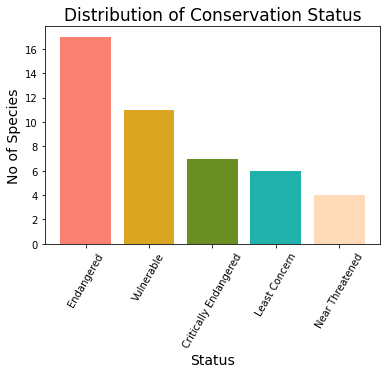

In [18]:
# Write a function to visualize the distribution of conserv. status scraped off both webpages and to save
# the visual as an image file in the directory


def TwoPages():
    ColorList = ['salmon', 'goldenrod', 'olivedrab', 'lightseagreen', 'peachpuff']
    No_bars = np.arange(5) #returns data as 5 evenly spaced parts
    Species = df6['Status'].value_counts()
    plt.bar(No_bars, No_species, color = ColorList) #plot 5 bars on x axis and freq on y
    plt.xlabel('Status', fontsize = 14)
    plt.ylabel('No of Species', fontsize=14)
    plt.xticks(No_bars, labels = Species.index, fontsize=10, rotation=60)
    plt.title('Distribution of Conservation Status', fontsize=17)
    plt.savefig("WildLife.png")

TwoPages()


In [19]:
# Save the second DataFrame that contains data from both webpages as a .csv file in the directory



<div class="alert alert-block alert-success">
<h2>Homework 8</h2><br>
<p>
If you don't finish all the steps in class, it will be your homework to complete this task in this file on your own. If your group completes the assignment in class, then choose another webpage(s) to process, as above, for your homework.</p>
<p>
<p>Submit the completed Jupyter Notebook as 'homework8.ipynb' via the designated area called 'Homework 8' under Week 8 on KEATS by 4pm on <b>Thursday 10th December 2020</b>.</p><br>    
</div>